In [14]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from lightning_modules.BaseSdeGenerativeModel import BaseSdeGenerativeModel
from models.fcn import FCN
import pickle
import sde_lib
from run_lib import get_manifold_dimension
from plot_utils import plot_spectrum
import os

In [18]:
#log_path =f'logs/line/'
#log_name = 've'

log_path = 'logs/ksphere/dim_10/n_1/'
log_name = 've'


In [19]:
config_path = os.path.join(log_path, log_name, 'config.pkl')
with open(config_path, 'rb') as file:
    config = pickle.load(file)
config.model.checkpoint_path = os.path.join(log_path, log_name, "checkpoints/best/last.ckpt")
#config.model.checkpoint_path = 'logs/ksphere/dim_10/n_2/along_axis_wide/checkpoints/best/epoch=17550--eval_loss_epoch=35.211.ckpt'
config.logging.log_path = log_path
config.logging.log_name = log_name

config.device = torch.device('cuda:0') if torch.cuda.is_available() else torch.device('cpu')

In [ ]:
import importlib
import run_lib
importlib.reload(run_lib)
from run_lib import get_manifold_dimension

config.model.checkpoint_path ='logs/line/ve/checkpoints/best/epoch=28127--eval_loss_epoch=13.282.ckpt'
get_manifold_dimension(config)


In [25]:
config.model

checkpoint_path: logs/ksphere/dim_10/n_1/ve/checkpoints/best/last.ckpt
dropout: 0.0
ema_rate: 0.9999
hidden_layers: 3
hidden_nodes: 512
name: fcn
num_scales: 1000
scale_by_sigma: false
sigma_max: 14.142135623730951
sigma_min: 0.01
state_size: 100

In [76]:
#path = 'logs/line/ve/svd/svd.pkl'
#path = 'logs/ksphere/dim_10/n_1/uniform/svd/svd_21000.pkl'
#path = 'logs/ksphere/dim_10/n_1/ve/svd.pkl'
#path = 'logs/ksphere/dim_50/n_1/random_isometry/uniform_random/svd/svd_1000.pkl'
path = 'logs/ksphere/dim_10/n_1/uniform_random/svd/svd_1000.pkl'
#path = 'logs/line/sine_line/svd/svd_1000.pkl'

with open(path, 'rb') as f:
    svd = pickle.load(f)

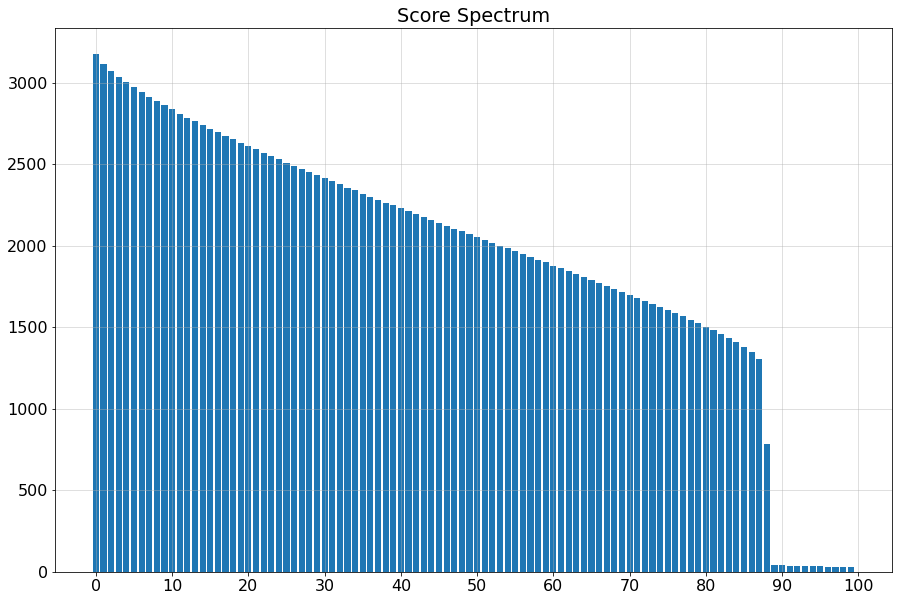

In [77]:
s = svd['singular_values']
plot_spectrum(s)

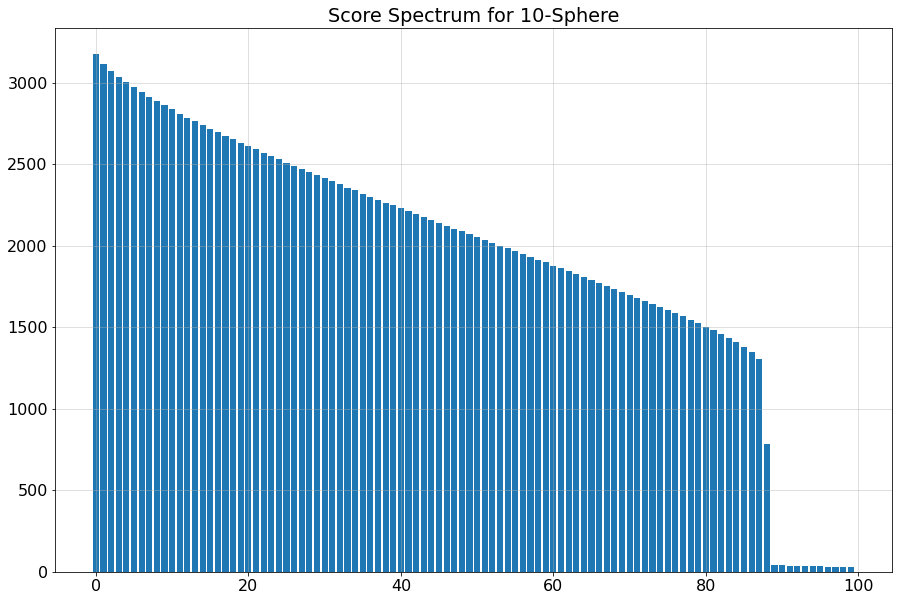

In [78]:
singular_values = s
sing_vals = (np.array(singular_values)).mean(axis=0)
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(15,10))
plt.bar(list(range(len(sing_vals))),sing_vals)
plt.grid(alpha=0.5)
plt.title('Score Spectrum for 10-Sphere')
plt.savefig('figures/10_sphere', dpi=300, facecolor='white')
plt.show()

In [67]:
s_zero= (np.array(singular_values)).mean(axis=0) #svd['singular_values'][0]
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

difference = np.array([s_zero[i-1] - s_zero[i] for i in range(1, len(s_zero))])
probs = softmax(difference/100)
d = len(probs) - np.argmax(probs)
print(d)

51


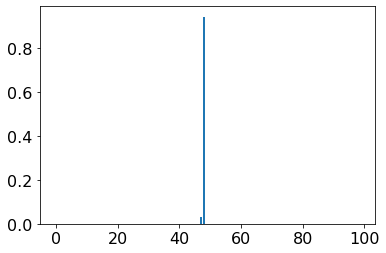

In [68]:
plt.bar(range(len(probs)), probs)
plt.show()

In [ ]:
import logging

In [ ]:
logging.basicConfig(filename='example.log', encoding='utf-8', level=logging.DEBUG)

In [ ]:
logging.debug('This message should go to the log file')
logging.info('So should this')
logging.warning('And this, too')
logging.error('And non-ASCII stuff, too, like Øresund and Malmö')

In [ ]:
try:
    1/0
except Exception as e:
    logging.error(e)